In [1]:
import sympy

In [5]:
%display typeset

In [22]:
var('Q S E I R D a b c d e f lam')

(Q, S, E, I, R, D, a, b, c, d, e, f, lam)

In [48]:
lam = c*I
dQdt=a*I*S - b*(1/I)*Q
dSdt=-a*I*S + b*(1/I)*Q - lam*S
dEdt=lam*S - d*E
dIdt=d*E - (e+f)*I
dRdt=f*I
dDdt=e*I

In [49]:
solve([dQdt, dSdt,dEdt,dIdt],[Q,S,E,I])

[[Q == 0, S == r5, E == 0, I == 0]]

In [50]:
jack=jacobian([dQdt, dSdt,dEdt,dIdt],[Q,S,E,I])
jack

[                -b/I                  I*a                    0        S*a + Q*b/I^2]
[                 b/I           -I*a - I*c                    0 -S*a - S*c - Q*b/I^2]
[                   0                  I*c                   -d                  S*c]
[                   0                    0                    d               -e - f]

In [51]:
cp = jack.characteristic_polynomial()
cp

x^4 + (I*a + I*c + d + e + f + b/I)*x^3 + (I*a*d + I*c*d - S*c*d + I*a*e + I*c*e + I*a*f + I*c*f + b*c + d*e + d*f + b*d/I + b*e/I + b*f/I)*x^2 + (I*a*d*e + I*c*d*e + I*a*d*f + I*c*d*f + Q*b*c*d/I - S*b*c*d/I + b*c*d + b*c*e + b*c*f + b*d*e/I + b*d*f/I)*x + b*c*d*e + b*c*d*f

In [52]:
F_cal = matrix([[lam*S],[0]])
F_cal

[I*S*c]
[    0]

In [53]:
V_cal_neg = matrix([[d*E],[(e+f)*I]])
V_cal_neg

[      E*d]
[I*(e + f)]

In [54]:
V_cal_pos = matrix([[0],[d*E]])
V_cal_pos

[  0]
[E*d]

In [55]:
V_cal = V_cal_neg-V_cal_pos
V_cal

[             E*d]
[-E*d + I*(e + f)]

In [56]:
F = jacobian(F_cal(S=1),[E,I])
F

[0 c]
[0 0]

In [57]:
V = jacobian(V_cal(S=1),[E,I])
V

[    d     0]
[   -d e + f]

In [58]:
M = F*V.inverse()
M

[c/(e + f) c/(e + f)]
[        0         0]

In [59]:
M=M.simplify_full()
M

[c/(e + f) c/(e + f)]
[        0         0]

In [60]:
M.eigenvalues()

[c/(e + f), 0]

In [61]:
M[0,0]

c/(e + f)

In [62]:
R0=M[0,0].simplify_full()
R0

c/(e + f)

In [63]:
R0.variables()

(c, e, f)

In [64]:
Ft = jacobian(F_cal,[E,I])
Vt = jacobian(V_cal,[E,I])
Mt = Ft*Vt.inverse()
show(pretty_print(html('$R_t=$')))
Rt = Mt[0,0]
Rt

<script type="math/tex">R_t=</script>

None

S*c/(e + f)

In [65]:
print(Rt)

S*c/(e + f)


In [73]:
R0(c=.55, e=.00066, f=.00239)

180.327868852459

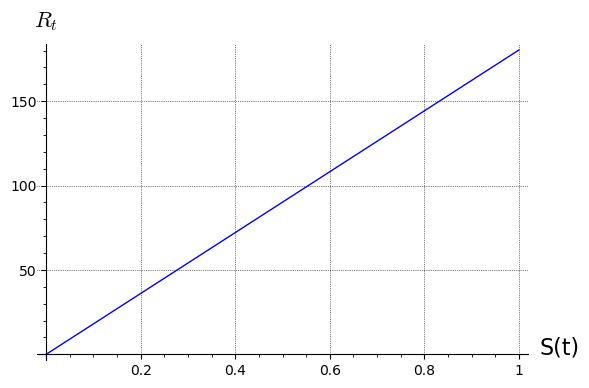

In [74]:
P = plot(Rt(c=.55, e=.00066, f=.00239),(S,0,1))
P.show(axes_labels=['S(t)','$R_t$'], gridlines=True)

In [68]:
###Análise da estabilidade

In [69]:
q = det(jack)
p = jack[0, 0] + jack[1, 1] + jack[2, 2] + jack[3, 3]
delta = p**2 -4*q
delta

-4*b*c*d*e - 4*b*c*d*f + (I*a + I*c + d + e + f + b/I)^2

In [70]:
delta.simplify_full()

(I^4*a^2 + I^4*c^2 + 2*I^2*a*b + I^2*d^2 + I^2*e^2 + I^2*f^2 + b^2 + 2*(I^4*a + I^2*b)*c + 2*(I^3*a + I^3*c + I*b)*d + 2*(I^3*a + I^3*c + I*b - (2*I^2*b*c - I^2)*d)*e + 2*(I^3*a + I^3*c + I^2*e + I*b - (2*I^2*b*c - I^2)*d)*f)/I^2

In [71]:
p

-I*a - I*c - d - e - f - b/I

In [72]:
q

b*c*d*e + b*c*d*f